In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


In [3]:
task_colors = {
'Waiting': 'grey',
'Crew pause': 'skyblue',
'Charging': 'yellow',
'F2 - Taronga Zoo': '#1b412f',
'F4 - Pyrmont Bay': '#8bc540',
'F5 - Neutral Bay': '#255d3d',
'F6 - Mosman': '#25ad4b',
'F7 - Double Bay': '#22b581',
'F8 - Cockatoo Island': '#4b5f2b',
'F9 - Rose Bay': '#009c4c',
'F9 - Watsons Bay': '#009c4c',
'F11 - Blackwattle Bay': '#0e744c'}

# Functions

In [6]:
def visualise_vessel_itinerarie(file_path,vessel):  
    # Load the data
    df = pd.read_csv(file_path)
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%H:%M')
    df['End_Time'] = pd.to_datetime(df['End_Time'], format='%H:%M')

    # Plot each task
    fig, ax = plt.subplots(figsize=(40, 1.6), dpi=500)

    for idx, row in df.iterrows():
        start_time, end_time = mdates.date2num(row['Start_Time']), mdates.date2num(row['End_Time'])
        duration = end_time - start_time
        rect = plt.Rectangle((start_time, 0.6), duration, 0.8, facecolor=task_colors[row['Task']], edgecolor='k', label=row['Task'], alpha = 0.7)
        ax.add_patch(rect)

        # Conditional text based on task type
        if row['Task'] in ['Waiting', 'Crew pause', 'Charging']:
            # Display only the Start_Wharf
            ax.text(start_time + duration/2, 1, row['Start_Wharf'],
                    horizontalalignment='center', verticalalignment='center', fontsize=12)
        else:
            # Display both the Start_Wharf and End_Wharf
            ax.text(start_time + duration/2, 1, f"{row['Start_Wharf']} --> {row['End_Wharf']}",
                    horizontalalignment='center', verticalalignment='center', fontsize=12)

    # Formatting the chart
    ax.set_ylim(0.5, 1.5)
    ax.set_yticks([])
    ax.set_xlim(mdates.date2num(datetime.strptime("05:30", '%H:%M')),mdates.date2num(datetime.strptime("11:30", '%H:%M')))

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

    ax.set_title(f'Vessel {vessel} Itinerary Timelines')

    #  egend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1.01, 1))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
def visualise_wharf_utilization(file_path,wharf):
    # Load data
    df = pd.read_csv(file_path)
    df[['Start_Time', 'End_Time']] = df['Time'].str.split('-', expand=True)
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%H:%M')
    df['End_Time'] = pd.to_datetime(df['End_Time'], format='%H:%M')

    # Sort the dataframe by Wharf and Start_Time
    df = df.sort_values(by=['Wharf', 'Start_Time'])

    # Set up the plot
    fig, ax = plt.subplots(figsize=(40, 2), dpi=500)
    wharf_row_tracker = {}
    # Plot each task
    for idx, row in df.iterrows():
        start_time = mdates.date2num(row['Start_Time'])
        end_time = mdates.date2num(row['End_Time'])
        duration = end_time - start_time

        # Determine the row
        wharf = row['Wharf']
        if wharf not in wharf_row_tracker:
            wharf_row_tracker[wharf] = 0  # first row
        row_num = wharf_row_tracker[wharf]  #current row

        # place the next vesselin a different row
        wharf_row_tracker[wharf] = (wharf_row_tracker[wharf] + 1) % 2 

        # rectangle setting
        rect = plt.Rectangle((start_time, 0.8 + row_num * 0.5), duration, 0.5,facecolor=task_colors.get(row['Task'], 'orange'), edgecolor='k', label=row['Task'], alpha=0.7)
        ax.add_patch(rect)
        ax.text(start_time + duration / 2, 1 + row_num * 0.5, row['Vessel'],horizontalalignment='center', verticalalignment='center', fontsize=12)

    # Formatting the chart
    ax.set_ylim(0.5, 1.5 + 0.5)
    ax.set_yticks([])
    ax.set_xlim(mdates.date2num(datetime.strptime("05:30", '%H:%M')), mdates.date2num(datetime.strptime("11:30", '%H:%M')))

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

    ax.set_title(f'Wharf {wharf} Utilization Timeline')

    #legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1.01, 1))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Visulization Test

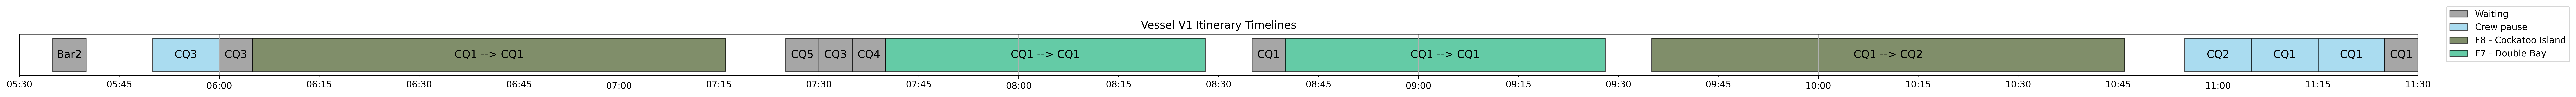

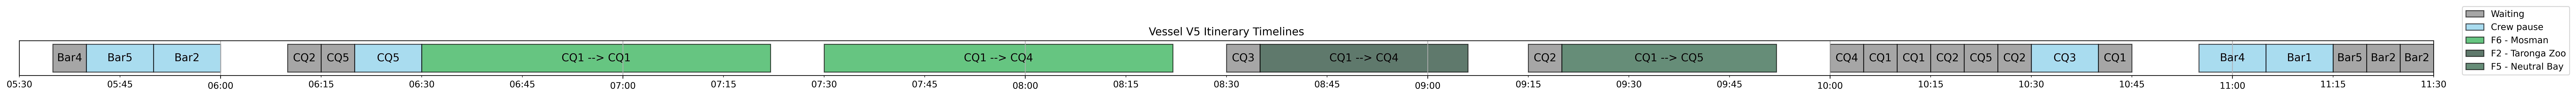

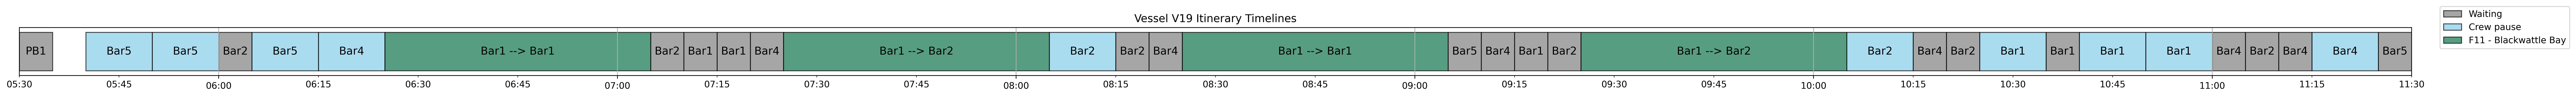

In [9]:
visualise_vessel_itinerarie('/Users/linlin/Desktop/FerryILP/ILPimplementation/vessel_itineraries/version4.4/vessel_V1_itinerary.csv', 'V1')
visualise_vessel_itinerarie('/Users/linlin/Desktop/FerryILP/ILPimplementation/vessel_itineraries/version4.4/vessel_V5_itinerary.csv', 'V5')
visualise_vessel_itinerarie('/Users/linlin/Desktop/FerryILP/ILPimplementation/vessel_itineraries/version4.4/vessel_V19_itinerary.csv', 'V19')

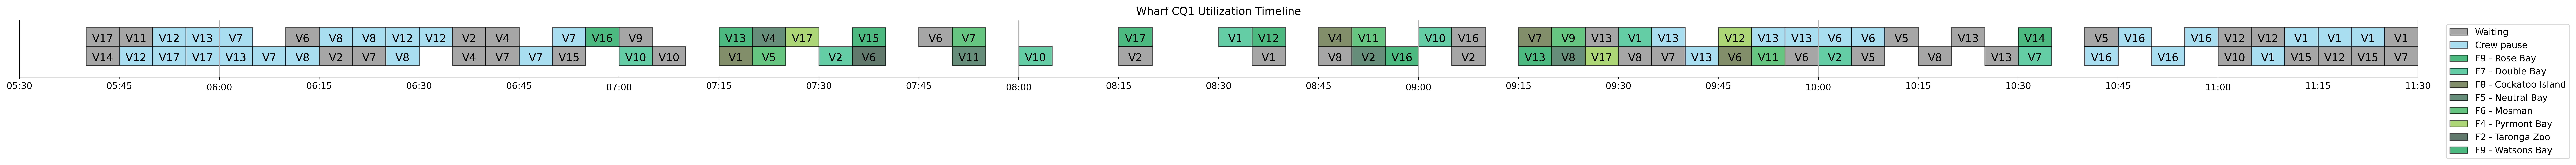

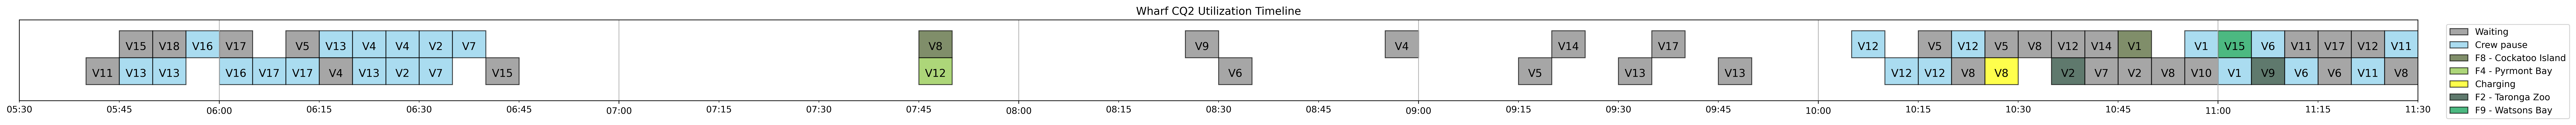

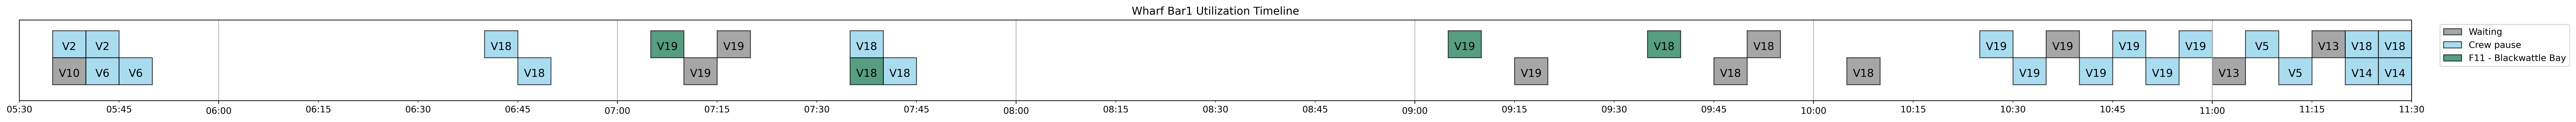

In [10]:
visualise_wharf_utilization('/Users/linlin/Desktop/FerryILP/ILPimplementation/wharf_utilizations/version4.4/wharf_CQ1_utilization.csv','CQ1')
visualise_wharf_utilization('/Users/linlin/Desktop/FerryILP/ILPimplementation/wharf_utilizations/version4.4/wharf_CQ2_utilization.csv','CQ2')
visualise_wharf_utilization('/Users/linlin/Desktop/FerryILP/ILPimplementation/wharf_utilizations/version4.4/wharf_Bar1_utilization.csv','Bar1')

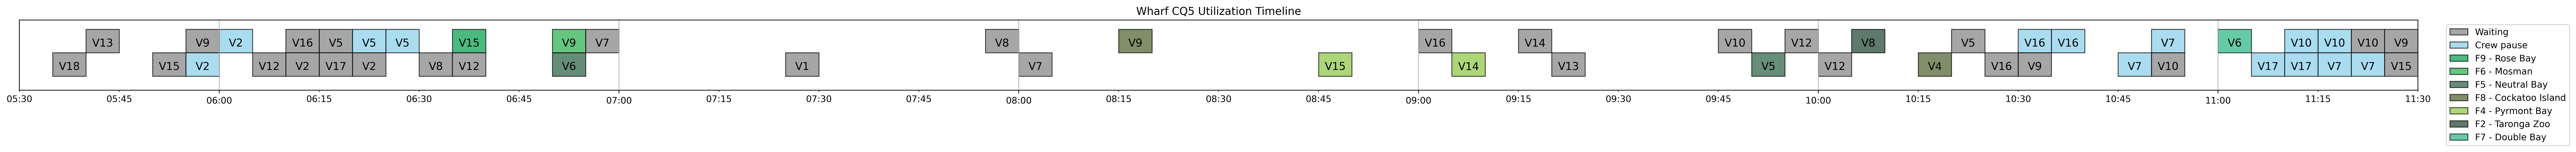

In [14]:
visualise_wharf_utilization('/Users/linlin/Desktop/FerryILP/ILPimplementation/wharf_utilizations/version4.4/wharf_CQ5_utilization.csv','CQ5')